In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import (RidgeClassifier,
                                  Ridge,
                                  SGDClassifier,
                                 LogisticRegression)
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import (AdaBoostClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier,
                              IsolationForest)
from sklearn.tree import DecisionTreeClassifier
from statsmodels.imputation import mice
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,
                             roc_auc_score,
                             roc_curve,
                             plot_roc_curve)
import pickle
from mlxtend.plotting import plot_decision_regions
from statsmodels.imputation import mice
from sklearn.impute import SimpleImputer 
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.svm import OneClassSVM

In [80]:
dftrain = pd.read_csv("./Train_gQ1XM0h.csv", na_values = np.nan)
dftest = pd.read_csv("./Test_wyCirpO_aS3XPkc.csv", na_values = np.nan)
print('Train shape -> ', dftrain.shape)
print('Test shape -> ', dftest.shape)

Train shape ->  (9527, 23)
Test shape ->  (5045, 22)


In [81]:
pd.set_option('display.max_columns', None)
dftrain.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [82]:
del dftrain['ID'], dftrain['Office_PIN'], dftrain['Applicant_City_PIN']
ID = dftest['ID']
del dftest['ID'], dftest['Office_PIN'], dftest['Applicant_City_PIN']

Application_Receipt_Date          0
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64


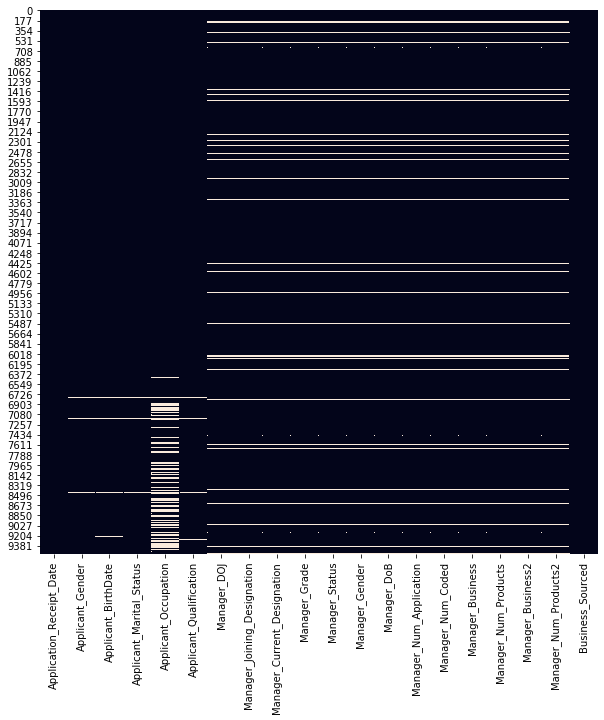

In [83]:
print(dftrain.isnull().sum())
plt.figure(figsize= [10,10])
sns.heatmap(dftrain.isnull(), cbar=False)

Application_Receipt_Date          0
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64


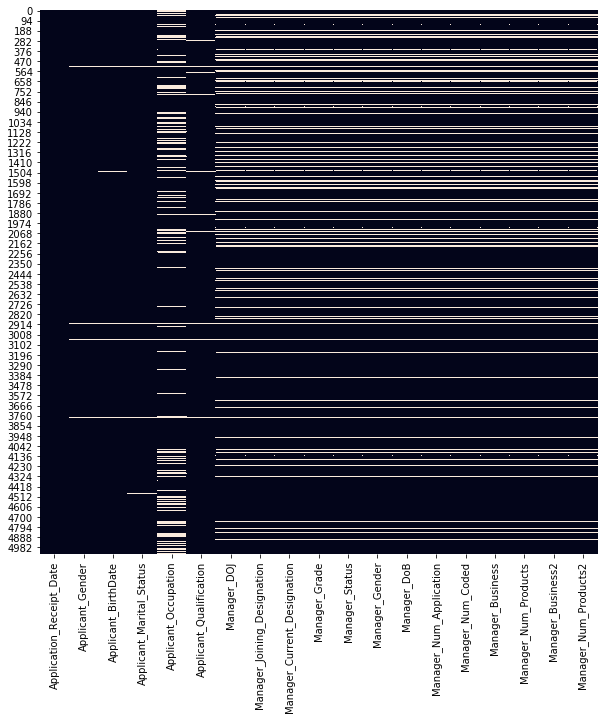

In [84]:
print(dftest.isnull().sum())
plt.figure(figsize= [10,10])
sns.heatmap(dftest.isnull(), cbar=False)

<b> Calculating Age of manager and applicant to find data insights

In [85]:
dftrain['manager_age'] = pd.to_datetime(dftrain['Manager_DOJ'], infer_datetime_format=True).dt.year - pd.to_datetime(dftrain['Manager_DoB'], infer_datetime_format=True).dt.year
dftrain['applicant_age'] = pd.to_datetime(dftrain['Application_Receipt_Date'], infer_datetime_format=True).dt.year - pd.to_datetime(dftrain['Applicant_BirthDate'], infer_datetime_format=True).dt.year
dftest['manager_age'] = pd.to_datetime(dftest['Manager_DOJ'], infer_datetime_format=True).dt.year - pd.to_datetime(dftest['Manager_DoB'], infer_datetime_format=True).dt.year
dftest['applicant_age'] = pd.to_datetime(dftest['Application_Receipt_Date'], infer_datetime_format=True).dt.year - pd.to_datetime(dftest['Applicant_BirthDate'], infer_datetime_format=True).dt.year
del dftrain['Manager_DOJ'], dftrain['Manager_DoB'], dftrain['Application_Receipt_Date'], dftrain['Applicant_BirthDate']
del dftest['Manager_DOJ'], dftest['Manager_DoB'], dftest['Application_Receipt_Date'], dftest['Applicant_BirthDate']

<b> printing all the unique catagorical values

In [86]:
def printunique(df, columns):
    
    for col in columns:
        print("Unique values in {}:{}".format(col,df[col].unique()))

print("Unique Values in Train data ->")
printunique(dftrain, ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification', 'Manager_Joining_Designation',
                     'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender'])

print("\nUnique Values in test data ->")
printunique(dftest, ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification','Manager_Joining_Designation',
                     'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender'])

Unique Values in Train data ->
Unique values in Applicant_Gender:['M' 'F' nan]
Unique values in Applicant_Marital_Status:['M' 'S' nan 'W' 'D']
Unique values in Applicant_Occupation:['Others' 'Business' 'Salaried' 'Self Employed' 'Student' nan]
Unique values in Applicant_Qualification:['Graduate' 'Class XII' 'Class X' 'Masters of Business Administration' nan
 'Associate/Fellow of Institute of Company Secretories of India'
 'Associate / Fellow of Institute of Chartered Accountans of India'
 'Others' 'Associate/Fellow of Insurance Institute of India'
 'Associate/Fellow of Acturial Society of India'
 'Certified Associateship of Indian Institute of Bankers'
 'Professional Qualification in Marketing']
Unique values in Manager_Joining_Designation:['Level 1' 'Level 2' nan 'Other' 'Level 3' 'Level 7' 'Level 5' 'Level 4'
 'Level 6']
Unique values in Manager_Current_Designation:['Level 2' 'Level 1' 'Level 3' nan 'Level 4' 'Level 5']
Unique values in Manager_Grade:[ 3.  2.  4. nan  5.  6.  1.  9. 

<b> As observed that we have numerous missing values hence applying SimpleImputer to get the missing data.

In [87]:
dftrain.replace({'Other': 0, 'Others':0, 'Level 1': 1, 'Level 2': 2, 'Level 3': 3, 'Level 4': 4, 'Level 5': 5, 'Level 6': 6,
                 'Level 7': 7, 'Class X': 1, 'Class XII': 2, 'Graduate': 3, 'Masters of Business Administration': 4,
                'Associate / Fellow of Institute of Chartered Accountans of India': 5,
                'Professional Qualification in Marketing': 6,
                'Associate/Fellow of Insurance Institute of India': 7,
                'Associate/Fellow of Institute of Company Secretories of India': 8,
                'Associate/Fellow of Acturial Society of India': 9,
                'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India': 10,
                'Certified Associateship of Indian Institute of Bankers':11,
                'Probation': 1, 'Confirmation': 2, 'M':1, 'F': 2, 'S': 3, 'D': 4, 'W': 5,
                 'Business': 1, 'Salaried': 2, 'Self Employed': 3, 'Student': 4}, inplace = True)

In [88]:
dftest.replace({'Other': 0, 'Others':0, 'Level 1': 1, 'Level 2': 2, 'Level 3': 3, 'Level 4': 4, 'Level 5': 5, 'Level 6': 6,
                 'Level 7': 7, 'Class X': 1, 'Class XII': 2, 'Graduate': 3, 'Masters of Business Administration': 4,
                'Associate / Fellow of Institute of Chartered Accountans of India': 5,
                'Professional Qualification in Marketing': 6,
                'Associate/Fellow of Insurance Institute of India': 7,
                'Associate/Fellow of Institute of Company Secretories of India': 8,
                'Associate/Fellow of Acturial Society of India': 9,
                'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India': 10,
                'Probation': 1, 'Confirmation': 2, 'M':1, 'F': 2, 'S': 3, 'D': 4, 'W': 5,
                 'Business': 1, 'Salaried': 2, 'Self Employed': 3, 'Student': 4}, inplace = True)

In [89]:
dftrain.columns

Index(['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced', 'manager_age',
       'applicant_age'],
      dtype='object')

In [90]:
###train = mice.MICEData(dftrain).data
dftest.columns

Index(['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'manager_age', 'applicant_age'],
      dtype='object')

In [91]:
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train = imputer_mf.fit_transform(dftrain)
train = pd.DataFrame(train)
train.columns = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced', 'manager_age',
       'applicant_age']

test = imputer_mf.fit_transform(dftest)
test = pd.DataFrame(test)
test.columns = ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'manager_age', 'applicant_age']

In [92]:
print("Unique Values in Train data ->")
printunique(train, ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification', 'Manager_Joining_Designation',
                     'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender'])

print("\nUnique Values in test data ->")
printunique(test, ['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification','Manager_Joining_Designation',
                     'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender'])

Unique Values in Train data ->
Unique values in Applicant_Gender:[1. 2.]
Unique values in Applicant_Marital_Status:[1. 3. 5. 4.]
Unique values in Applicant_Occupation:[0. 1. 2. 3. 4.]
Unique values in Applicant_Qualification:[ 3.  2.  1.  4.  8.  5.  0.  7.  9. 11.  6.]
Unique values in Manager_Joining_Designation:[1. 2. 0. 3. 7. 5. 4. 6.]
Unique values in Manager_Current_Designation:[2. 1. 3. 4. 5.]
Unique values in Manager_Grade:[ 3.  2.  4.  5.  6.  1.  9.  7.  8. 10.]
Unique values in Manager_Status:[2. 1.]
Unique values in Manager_Gender:[1. 2.]

Unique Values in test data ->
Unique values in Applicant_Gender:[1. 2.]
Unique values in Applicant_Marital_Status:[3. 1. 4. 5.]
Unique values in Applicant_Occupation:[2. 0. 1. 3. 4.]
Unique values in Applicant_Qualification:[ 3.  4.  2.  0.  1.  5.  6. 10.]
Unique values in Manager_Joining_Designation:[1. 2. 3. 4. 5. 6.]
Unique values in Manager_Current_Designation:[1. 3. 2. 4. 5.]
Unique values in Manager_Grade:[2. 4. 3. 6. 5. 7. 8.]
Uni

Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
manager_age                    0
applicant_age                  0
dtype: int64


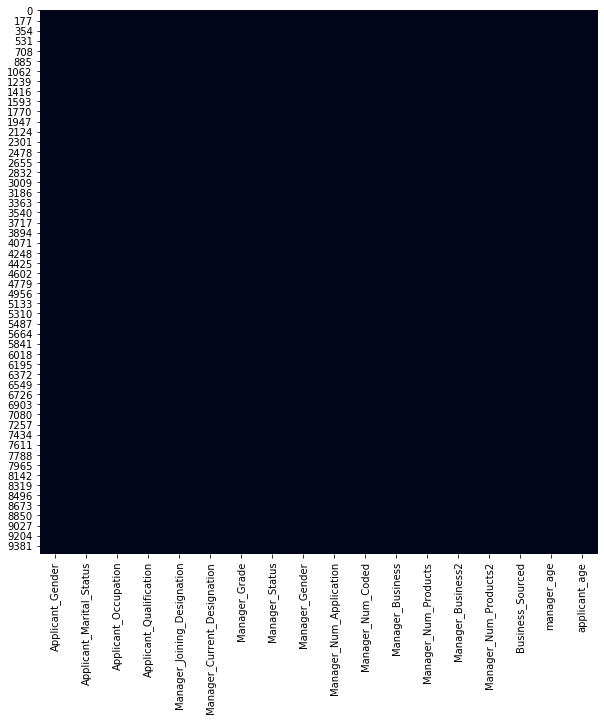

In [93]:
print(train.isnull().sum())
plt.figure(figsize= [10,10])
sns.heatmap(train.isnull(), cbar=False)

Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
manager_age                    0
applicant_age                  0
dtype: int64


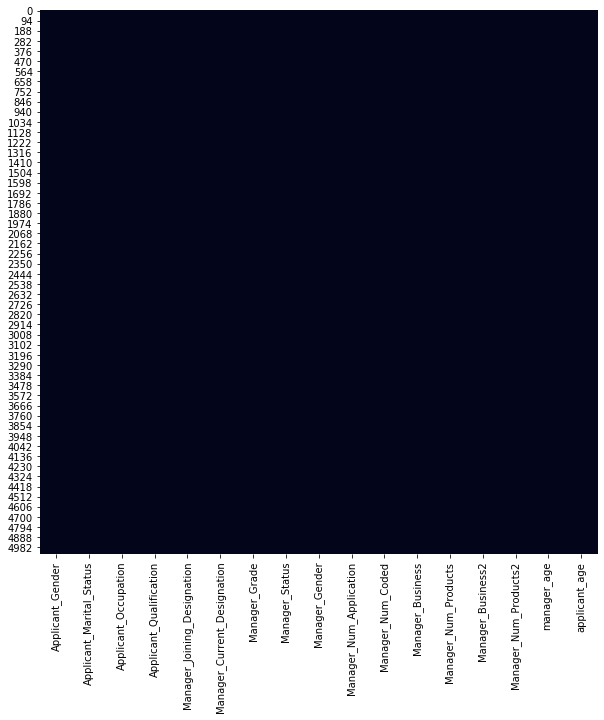

In [94]:
print(test.isnull().sum())
plt.figure(figsize= [10,10])
sns.heatmap(test.isnull(), cbar=False)

In [95]:
train['Applicant_Gender'].replace({1: 'M', 2: 'F'}, inplace = True)
test['Applicant_Gender'].replace({1: 'M', 2: 'F'}, inplace = True)

train['Applicant_Marital_Status'].replace({1: 'M', 3: 'S', 4: 'D', 5: 'W'}, inplace = True)
test['Applicant_Marital_Status'].replace({1: 'M', 3: 'S',  4: 'D', 5: 'W'}, inplace = True)

train['Applicant_Occupation'].replace({0: 'other', 1: 'Business', 2: 'Salaried', 3: 'Self Employed', 4: 'Student'}, inplace = True)
test['Applicant_Occupation'].replace({0: 'other', 1: 'Business', 2: 'Salaried', 3: 'Self Employed', 4: 'Student'}, inplace = True)

train['Applicant_Qualification'].replace({1: 'Class X',2: 'Class XII',3:'Graduate',4: 'Masters of Business Administration',
                5: 'Associate / Fellow of Institute of Chartered Accountans of India',
                6: 'Professional Qualification in Marketing',
                7: 'Associate/Fellow of Insurance Institute of India',
                8: 'Associate/Fellow of Institute of Company Secretories of India',
                9: 'Associate/Fellow of Acturial Society of India',
                10: 'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India',
                11: 'Certified Associateship of Indian Institute of Bankers'}, inplace = True)
test['Applicant_Qualification'].replace({1: 'Class X',2: 'Class XII',3:'Graduate',4: 'Masters of Business Administration',
                5: 'Associate / Fellow of Institute of Chartered Accountans of India',
                6: 'Professional Qualification in Marketing',
                7: 'Associate/Fellow of Insurance Institute of India',
                8: 'Associate/Fellow of Institute of Company Secretories of India',
                9: 'Associate/Fellow of Acturial Society of India',
                10: 'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India',
                11: 'Certified Associateship of Indian Institute of Bankers'}, inplace = True)

train['Manager_Status'].replace({1: 'Probation', 2: 'Confirmation'}, inplace = True)
test['Manager_Status'].replace({1: 'Probation', 2: 'Confirmation'}, inplace = True)

train['Manager_Gender'].replace({1: 'M', 2: 'F'}, inplace = True)
test['Manager_Gender'].replace({1: 'M', 2: 'F'}, inplace = True)

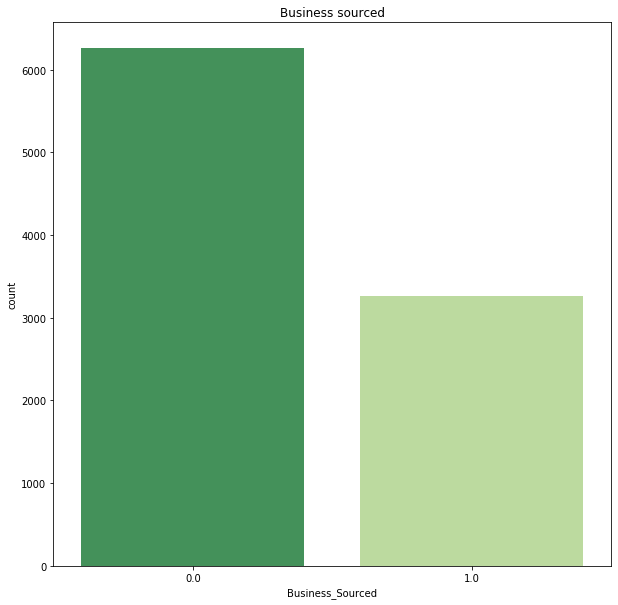

In [96]:
plt.figure(figsize= [10,10])
sns.countplot(train['Business_Sourced'], palette="YlGn_r")
plt.title('Business sourced')
plt.show()

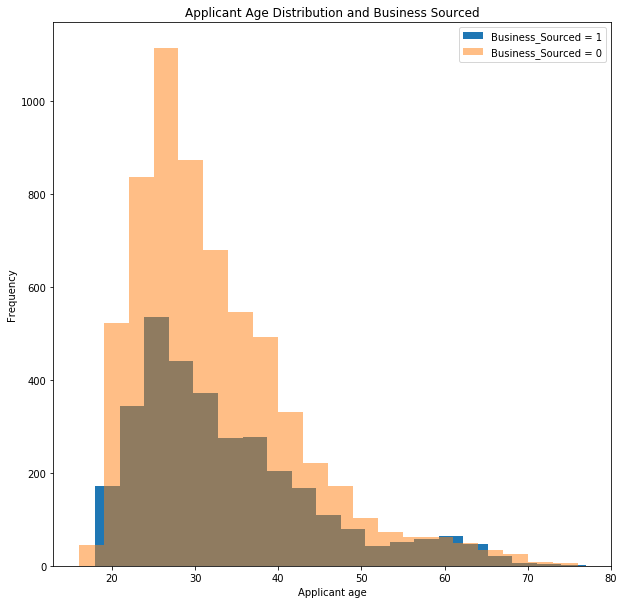

In [97]:
plt.figure(figsize= [10,10])
train['applicant_age'][train['Business_Sourced']==1].plot.hist(bins=20, alpha=1, label ='Business_Sourced = 1')
train['applicant_age'][train['Business_Sourced']==0].plot.hist(bins=20, alpha=0.5, label ='Business_Sourced = 0')
plt.xlabel('Applicant age')
plt.title('Applicant Age Distribution and Business Sourced')
plt.legend()
plt.show()

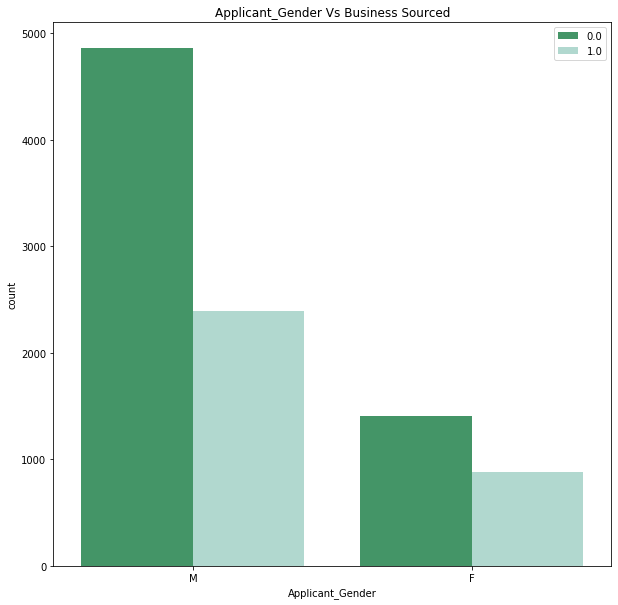

In [98]:
plt.figure(figsize= [10,10])
sns.countplot(train['Applicant_Gender'], hue = train['Business_Sourced'], palette="BuGn_r")
plt.xlabel('Applicant_Gender')
plt.title('Applicant_Gender Vs Business Sourced')
plt.legend()
plt.show()

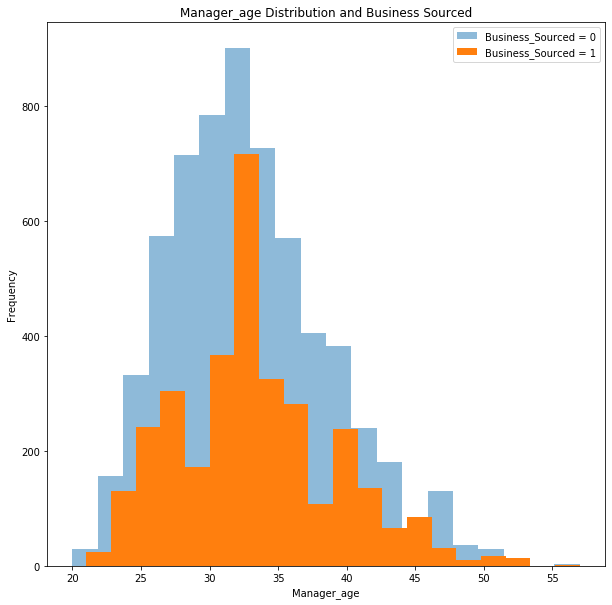

In [99]:
plt.figure(figsize= [10,10])
train['manager_age'][train['Business_Sourced']==0].plot.hist(bins=20, alpha=0.5, label ='Business_Sourced = 0')
train['manager_age'][train['Business_Sourced']==1].plot.hist(bins=20, alpha=1, label ='Business_Sourced = 1')
plt.xlabel('Manager_age')
plt.title('Manager_age Distribution and Business Sourced')
plt.legend()
plt.show()

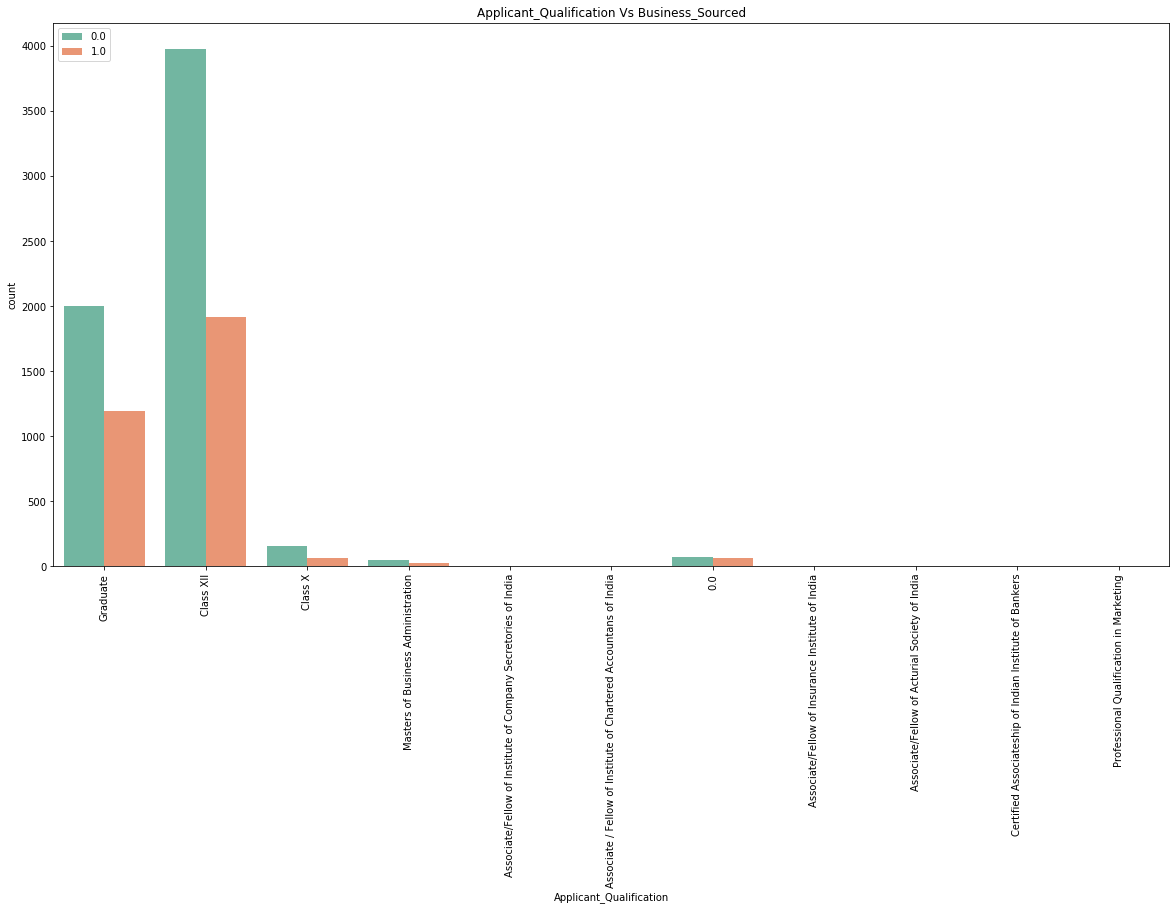

In [100]:
plt.figure(figsize= [20,10])
sns.countplot(train['Applicant_Qualification'], hue = train['Business_Sourced'], palette="Set2")
plt.xticks(rotation=90)
plt.legend()
plt.title("Applicant_Qualification Vs Business_Sourced")
plt.show()

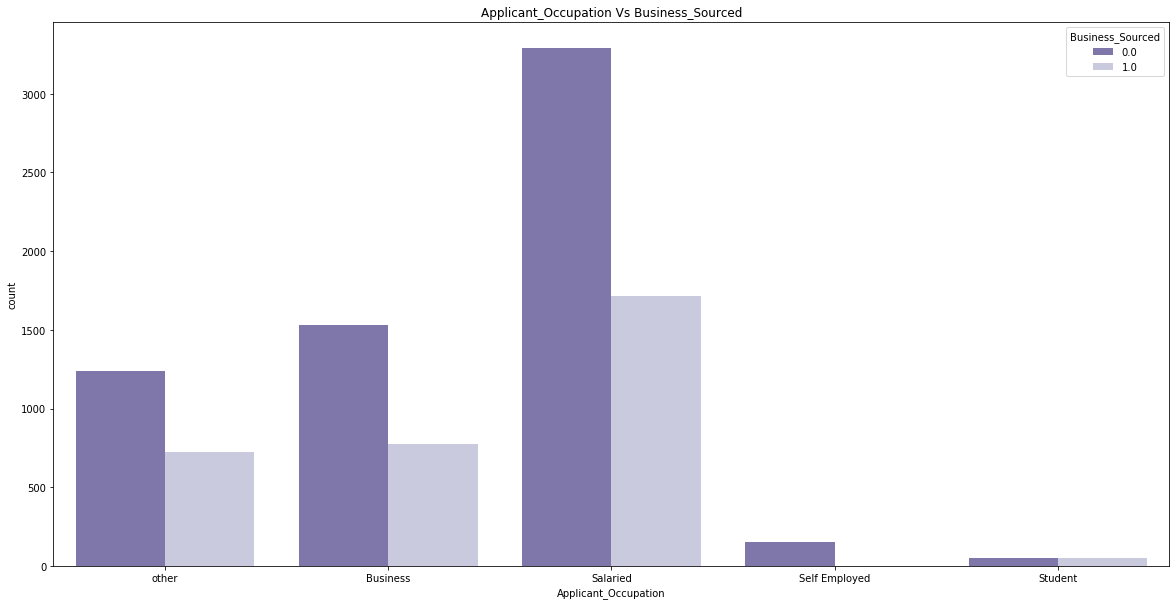

In [101]:
plt.figure(figsize= [20,10])
plt.title("Applicant_Occupation Vs Business_Sourced")
sns.countplot(train['Applicant_Occupation'], hue= train['Business_Sourced'], palette = 'Purples_r')

plt.show()

<Figure size 1440x1440 with 0 Axes>

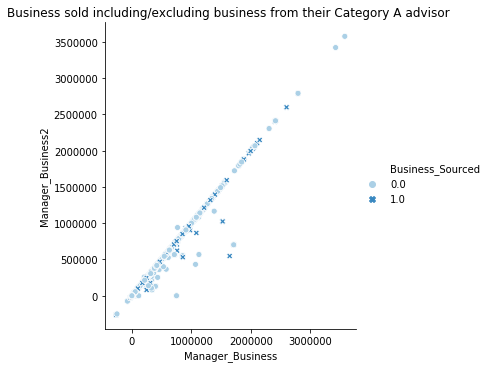

In [102]:
plt.figure(figsize= [20,20])
sns.relplot(x = 'Manager_Business', y = 'Manager_Business2', hue = 'Business_Sourced',
            style = 'Business_Sourced', palette = 'Blues', data = train)
plt.title("Business sold including/excluding business from their Category A advisor ")
plt.show()

<Figure size 1440x1440 with 0 Axes>

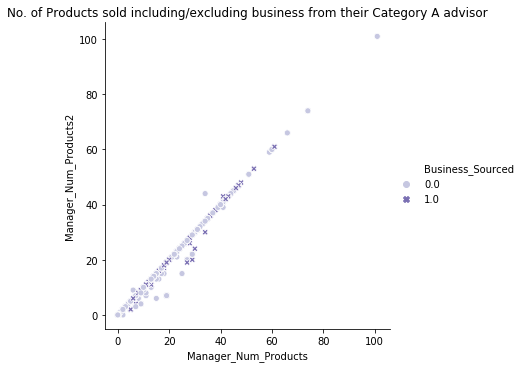

In [103]:
plt.figure(figsize= [20,20])
sns.relplot(x = 'Manager_Num_Products', y = 'Manager_Num_Products2', hue = 'Business_Sourced',
            style = 'Business_Sourced', palette = 'Purples', data = train)
plt.title("No. of Products sold including/excluding business from their Category A advisor")
plt.show()

In [104]:
df = train.append(test)

<b> Handling nominal data

In [105]:
''''Get Dummies for Nominal data and deleting the collumns that are not required'''
def nominal(df,nominal):
    if(type(nominal) is list):
        for i in nominal:
            dummies = pd.get_dummies(df[i], drop_first=True)
            del df[i]
            df = pd.concat([df,dummies], axis=1)
    else:
        raise ValueError("Expected list for nominal")
    return df

df = nominal(df, ['Applicant_Gender', 'Applicant_Marital_Status',  'Applicant_Occupation',
                            'Applicant_Qualification', 'Manager_Status', 'Manager_Gender'])

In [106]:
print(df.shape)
df.head()

(14572, 33)


,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,manager_age,applicant_age,M,M,S,W,Salaried,Self Employed,Student,other,Associate / Fellow of Institute of Chartered Accountans of India,Associate/Fellow of Acturial Society of India,Associate/Fellow of Institute of Company Secretories of India,Associate/Fellow of Institute of Institute of Costs and Works Accountants of India,Associate/Fellow of Insurance Institute of India,Certified Associateship of Indian Institute of Bankers,Class X,Class XII,Graduate,Masters of Business Administration,Professional Qualification in Marketing,Probation,M
0,1.0,2.0,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,0.0,27.0,36.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1.0,2.0,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,1.0,27.0,24.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.0,1.0,2.0,0.0,0.0,357184.0,24.0,357184.0,24.0,0.0,37.0,41.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1.0,3.0,4.0,0.0,0.0,318356.0,22.0,318356.0,22.0,0.0,25.0,19.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,1.0,2.0,2.0,1.0,230402.0,17.0,230402.0,17.0,0.0,35.0,22.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [107]:
df.columns

Index(['Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced', 'manager_age',
       'applicant_age', 'M', 'M', 'S', 'W', 'Salaried', 'Self Employed',
       'Student', 'other',
       'Associate / Fellow of Institute of Chartered Accountans of India',
       'Associate/Fellow of Acturial Society of India',
       'Associate/Fellow of Institute of Company Secretories of India',
       'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India',
       'Associate/Fellow of Insurance Institute of India',
       'Certified Associateship of Indian Institute of Bankers', 'Class X',
       'Class XII', 'Graduate', 'Masters of Business Administration',
       'Professional Qualification in Marketing', 'Probation', 'M'],
      dtype='object')

In [108]:
df.columns = ['Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced', 'manager_age',
       'applicant_age', 'M1', 'M2', 'S', 'W', 'Salaried', 'Self Employed',
       'Student', 'other',
       'Chartered Accountans of India',
       'Acturial Society of India',
       'Company Secretories of India',
       'Costs and Works Accountants of India',
       'Insurance Institute of India',
       'Indian Institute of Bankers', 'Class X',
       'Class XII', 'Graduate', 'MBA',
       'Professional Qualification in Marketing', 'Probation', 'M']

In [109]:
train = df.iloc[:9527]
test = df.iloc[9527:]

In [110]:
train.columns = ['Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced', 'manager_age',
       'applicant_age', 'M1', 'M2', 'S', 'W', 'Salaried', 'Self Employed',
       'Student', 'other',
       'Chartered Accountans of India',
       'Acturial Society of India',
       'Company Secretories of India',
       'Costs and Works Accountants of India',
       'Insurance Institute of India',
       'Indian Institute of Bankers', 'Class X',
       'Class XII', 'Graduate', 'MBA',
       'Professional Qualification in Marketing', 'Probation', 'M']

test.columns = ['Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced', 'manager_age',
       'applicant_age', 'M1', 'M2', 'S', 'W', 'Salaried', 'Self Employed',
       'Student', 'other',
       'Chartered Accountans of India',
       'Acturial Society of India',
       'Company Secretories of India',
       'Costs and Works Accountants of India',
       'Insurance Institute of India',
       'Indian Institute of Bankers', 'Class X',
       'Class XII', 'Graduate', 'MBA',
       'Professional Qualification in Marketing', 'Probation', 'M']

<b> Feature Selection and Multicolinearity

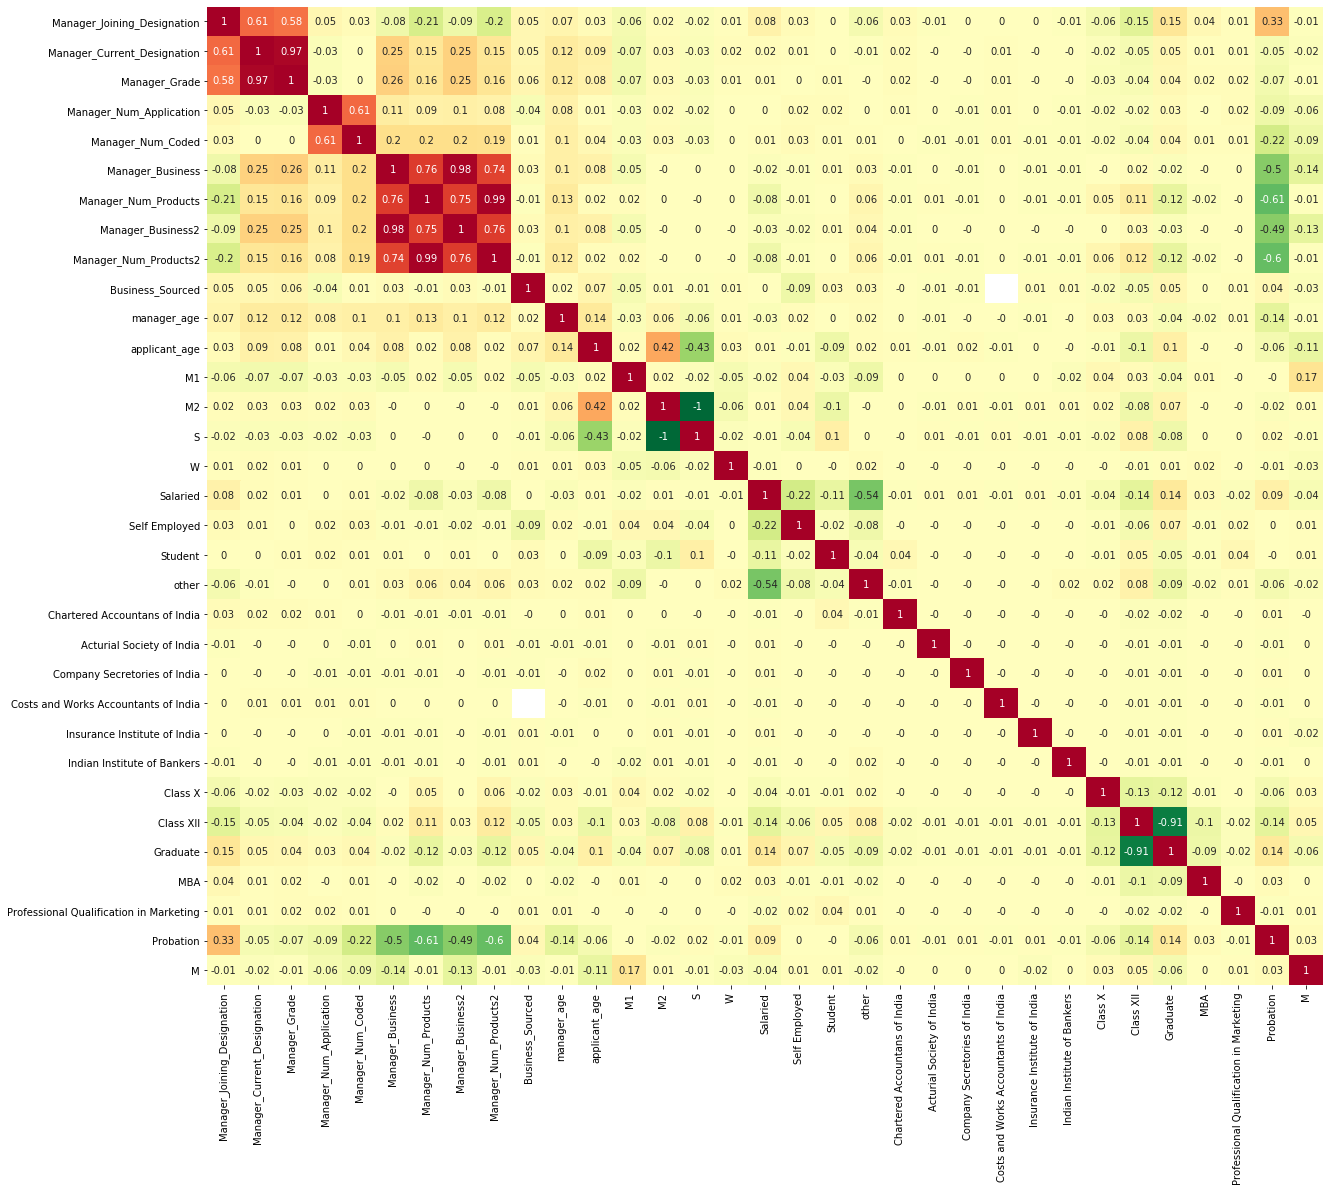

In [111]:
plt.figure(figsize=(20,18))
sns.heatmap(round(df.corr(),2), annot = True, cmap = 'RdYlGn_r', cbar=False)
plt.show()

<b>from above heat map we can say</b> Manager_Current_Designation <-> Manager_Grade <b>and</b> 
Manager_Business <-> Manager_Business2<b> are highly correlated.<p>Hence getting VIF for better understanding</b>

In [112]:
def vif(df):
    
    for col in df.columns:
        model = sm.OLS(df[col], df.drop(col,axis=1))
        results = model.fit()
        rsq = results.rsquared
        print("VIF for {} -> {}".format(col, round(1 / (1 - rsq), 2)))

In [113]:
vif(train)

VIF for Manager_Joining_Designation -> 10.07
VIF for Manager_Current_Designation -> 121.29
VIF for Manager_Grade -> 181.54
VIF for Manager_Num_Application -> 2.45
VIF for Manager_Num_Coded -> 2.05
VIF for Manager_Business -> 396.72
VIF for Manager_Num_Products -> 2370.22
VIF for Manager_Business2 -> 393.92
VIF for Manager_Num_Products2 -> 2363.37
VIF for Business_Sourced -> 1.57
VIF for manager_age -> 35.1
VIF for applicant_age -> 15.28
VIF for M1 -> 0.05
VIF for M2 -> 1.62
VIF for S -> 2.84
VIF for W -> 1.09
VIF for Salaried -> 0.09
VIF for Self Employed -> 1.08
VIF for Student -> 1.07
VIF for other -> 0.17
VIF for Chartered Accountans of India -> 1.03
VIF for Acturial Society of India -> 1.01
VIF for Company Secretories of India -> 1.01
VIF for Costs and Works Accountants of India -> nan


C:\Users\Anirban\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


VIF for Insurance Institute of India -> 1.01
VIF for Indian Institute of Bankers -> 1.01
VIF for Class X -> 2.7
VIF for Class XII -> 0.03
VIF for Graduate -> 0.95
VIF for MBA -> 1.55
VIF for Professional Qualification in Marketing -> 1.02
VIF for Probation -> 0.2
VIF for M -> 0.12


from VIF it's evident that <b>Manager_Grade, Manager_Business and Manager_Num_Products</b> can be dropped down

In [114]:
del train['Manager_Grade'], train['Manager_Business'], train['Manager_Num_Products']
del test['Manager_Grade'], test['Manager_Business'], test['Manager_Num_Products']

<b> Feature Entraction using ensemble technique

In [115]:
X = train.drop('Business_Sourced', axis=1)
Y = train['Business_Sourced']

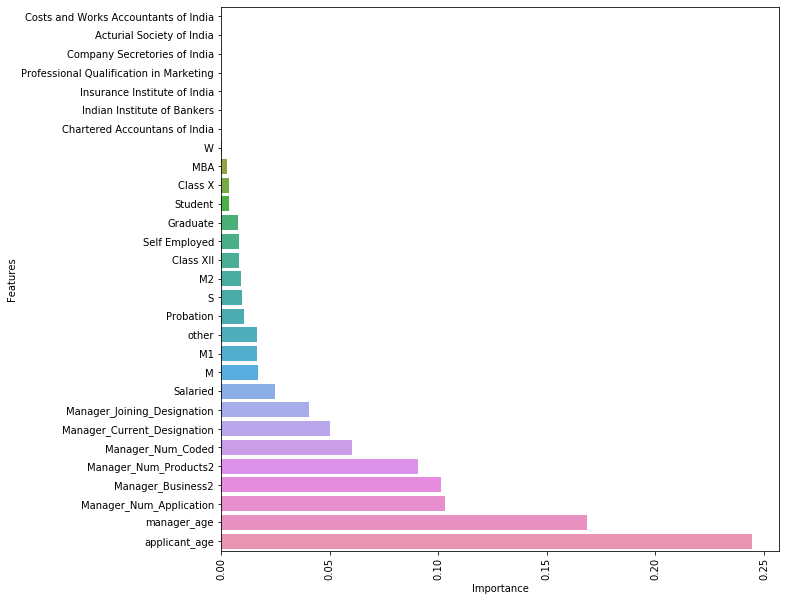

                                   Features  Importance
19     Costs and Works Accountants of India    0.000000
17                Acturial Society of India    0.000027
18             Company Secretories of India    0.000061
26  Professional Qualification in Marketing    0.000117
20             Insurance Institute of India    0.000127
21              Indian Institute of Bankers    0.000156
16            Chartered Accountans of India    0.000193
11                                        W    0.000407
25                                      MBA    0.002598
22                                  Class X    0.003627
14                                  Student    0.003745
24                                 Graduate    0.007766
13                            Self Employed    0.008233
23                                Class XII    0.008242
9                                        M2    0.009296
10                                        S    0.009547
27                                Probation    0

In [116]:
modelfe = ExtraTreesClassifier()
modelfe.fit(X,Y)
dictio = {'Features':X.columns, 'Importance':modelfe.feature_importances_}
feature_select = pd.DataFrame(dictio)
plt.figure(figsize=(10,10))
feature_select = feature_select.sort_values(by='Importance')
sns.barplot(x='Importance', y='Features',data=feature_select)
plt.xticks(rotation=90)
plt.show()
print(feature_select)

In [117]:
# Function to drop columns
def drop(df, columns):
    for col in columns:
        del df[col]
    return df

train =  drop(train, ['Costs and Works Accountants of India',
                      'Acturial Society of India',
                      'Company Secretories of India',
                      'Professional Qualification in Marketing',
                      'Insurance Institute of India',
                      'Chartered Accountans of India',
                      'W'])

test = drop(test, ['Costs and Works Accountants of India',
                      'Acturial Society of India',
                      'Company Secretories of India',
                      'Professional Qualification in Marketing',
                      'Insurance Institute of India',
                      'Business_Sourced',
                      'Chartered Accountans of India',
                      'W'])                 

In [118]:
X = train.drop('Business_Sourced', axis=1)
Y = train['Business_Sourced']

<b> Splitting the data into train and test and Scaling our data set using standard scaler

In [119]:
scaler = StandardScaler()
Xr = scaler.fit_transform(X)
scaled_test = scaler.fit_transform(test)

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(Xr,Y,test_size=0.2,random_state=100)
print("Train data Shape -> ",xtrain.shape)
print("Test data Shape -> ",xtest.shape)

Train data Shape ->  (7621, 22)
Test data Shape ->  (1906, 22)


In [121]:
ytrain.value_counts()

0.0    4993
1.0    2628
Name: Business_Sourced, dtype: int64

<b> Getting model scores from various classification models

In [122]:
models = [('Logistic_Classifier',LogisticRegression()),
          ('Ridge_Classifier',RidgeClassifier()),
          ('SGD_Classifier',SGDClassifier()),
          ('KNN_Classifier',KNeighborsClassifier()),
          ('SVC', SVC()),
          ('DecisionTree_Classifier', DecisionTreeClassifier()),
          ('AdaBoost_Classifier', AdaBoostClassifier()),
          ('ExtraTrees_Classifier',ExtraTreesClassifier()),
          ('RandomForest_Classifier', RandomForestClassifier()),
          ('GradientBoosting_Classifier', GradientBoostingClassifier()),
          ('Bagging_Classifier', BaggingClassifier()),
          ('XGBClassifier', XGBClassifier()),
          ('IsolationForest', IsolationForest())]

In [123]:
model_score = pd.DataFrame(columns = ['model', 'score'])
temp1 = []
temp2 = []

for i, j in models:
        j.fit(xtrain, ytrain)
        ypred = j.predict(xtest)
        temp1.append(i)
        temp2.append(accuracy_score(ytest, ypred))
        
model_score['model'] = temp1
model_score['score'] = temp2
print(model_score.sort_values(by='score', ascending = False))

                          model     score
9   GradientBoosting_Classifier  0.666842
4                           SVC  0.665792
11                XGBClassifier  0.664743
0           Logistic_Classifier  0.663169
2                SGD_Classifier  0.663169
1              Ridge_Classifier  0.662644
6           AdaBoost_Classifier  0.661595
8       RandomForest_Classifier  0.640084
3                KNN_Classifier  0.625918
7         ExtraTrees_Classifier  0.621196
10           Bagging_Classifier  0.620147
5       DecisionTree_Classifier  0.588667
12              IsolationForest  0.240294


<b> Code for ROC curve plot

In [124]:
def plot_roc(model,xtest,ytest,color='b'):
    proba = model.decision_function(xtest)
    fpr, tpr, thresholds = roc_curve(ytest, proba)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color, label = 'AUC = %0.2f' % roc_auc_score(ytest,ypred))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Applying GradientBoost

In [212]:
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))

[[1218   49]
 [ 587   52]]
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79      1267
         1.0       0.51      0.08      0.14       639

    accuracy                           0.67      1906
   macro avg       0.59      0.52      0.47      1906
weighted avg       0.62      0.67      0.57      1906

AUC ->  0.5213515593252579


In [320]:
params = {'learning_rate':[0.1,0.01,0.001,0.0001],
          'max_features':['auto', 'sqrt', 'log2'],
          'n_estimators':[200,300,500,700],
          'min_samples_split':[2,5,8,10,15,18],
          'max_depth':[6,8,10,12]}
          

RandomCV = RandomizedSearchCV(estimator =GradientBoostingClassifier(),
                              cv =5,
                              n_iter =10,
                              verbose =2,
                              param_distributions =params,
                              random_state =12,
                              scoring ='balanced_accuracy')

RandomCV.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01, total=   9.1s
[CV] n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01, total=   9.0s
[CV] n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01, total=   9.1s
[CV] n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01, total=   8.6s
[CV] n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  n_estimators=200, min_samples_split=2, max_features=auto, max_depth=10, learning_rate=0.01, total=   8.8s
[CV] n_estimators=500, min_samples_split=10, max_features=log2, max_depth=12, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=10, max_features=log2, max_depth=12, learning_rate=0.1, total=  16.0s
[CV] n_estimators=500, min_samples_split=10, max_fea

[CV]  n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001, total=   7.5s
[CV] n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001 
[CV]  n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001, total=   8.1s
[CV] n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001 
[CV]  n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001, total=   7.5s
[CV] n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001 
[CV]  n_estimators=200, min_samples_split=2, max_features=log2, max_depth=12, learning_rate=0.0001, total=   8.0s
[CV] n_estimators=500, min_samples_split=8, max_features=auto, max_depth=8, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=8, max_features=auto, max_depth=8, learning_rate=0.1, total=  14.1s
[CV] n_estimators=500, min_samples_split=8

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [321]:
RandomCV.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [322]:
model =GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))

[[1108  159]
 [ 506  133]]
              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77      1267
         1.0       0.46      0.21      0.29       639

    accuracy                           0.65      1906
   macro avg       0.57      0.54      0.53      1906
weighted avg       0.61      0.65      0.61      1906

AUC ->  0.5413222119704106


### Applying SVC

[[731 536]
 [285 354]]
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64      1267
         1.0       0.40      0.55      0.46       639

    accuracy                           0.57      1906
   macro avg       0.56      0.57      0.55      1906
weighted avg       0.61      0.57      0.58      1906

AUC ->  0.5654720218178315


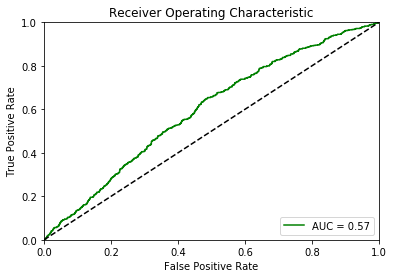

In [238]:
model = SVC(probability=True, class_weight= 'balanced', random_state=10)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

In [240]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 10,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [215]:
params = {'kernel': ['sigmoid','rbf','poly']}
          

RandomCV = RandomizedSearchCV(estimator = SVC(class_weight='balanced', random_state=10),
                              cv =5,
                              n_iter =10,
                              verbose =2,
                              param_distributions =params,
                              random_state =12,
                              scoring ='f1')

RandomCV.fit(xtest,ytest)

C:\Users\Anirban\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] kernel=sigmoid ..................................................
[CV] ................................... kernel=sigmoid, total=   0.1s
[CV] kernel=sigmoid ..................................................
[CV] ................................... kernel=sigmoid, total=   0.1s
[CV] kernel=sigmoid ..................................................
[CV] ................................... kernel=sigmoid, total=   0.1s
[CV] kernel=sigmoid ..................................................
[CV] ................................... kernel=sigmoid, total=   0.2s
[CV] kernel=sigmoid ..................................................
[CV] ................................... kernel=sigmoid, total=   0.1s
[CV] kernel=rbf ......................................................
[CV] ....................................... kernel=rbf, total=   0.1s
[CV] kernel=rbf ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=10,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'kernel': ['sigmoid', 'rbf', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='f1', verbose=2)

In [216]:
RandomCV.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

[[773 494]
 [325 314]]
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65      1267
         1.0       0.39      0.49      0.43       639

    accuracy                           0.57      1906
   macro avg       0.55      0.55      0.54      1906
weighted avg       0.60      0.57      0.58      1906

AUC ->  0.5507477029148494


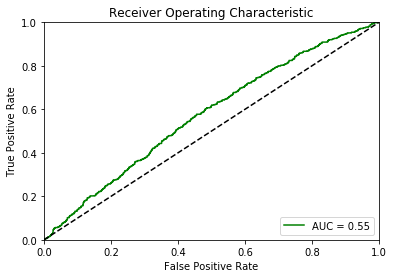

In [217]:
model = SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

In [203]:
np.unique(np.array(ypred), return_counts = True)

(array([0., 1.]), array([1434,  472], dtype=int64))

In [73]:
params = {'C':[0.01,0.1,1,10,50,100,500,1000,200],
          'gamma':[0.01,0.1,1,10,50,100,500,1000,200]}
          

RandomCV = RandomizedSearchCV(estimator = SVC(class_weight='balanced', random_state=10),
                              cv =5,
                              n_iter =10,
                              verbose =2,
                              param_distributions =params,
                              random_state =12,
                              scoring ='f1_weighted')

RandomCV.fit(xtest,ytest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=10, C=500 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. gamma=10, C=500, total=   0.2s
[CV] gamma=10, C=500 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................................. gamma=10, C=500, total=   0.2s
[CV] gamma=10, C=500 .................................................
[CV] .................................. gamma=10, C=500, total=   0.2s
[CV] gamma=10, C=500 .................................................
[CV] .................................. gamma=10, C=500, total=   0.2s
[CV] gamma=10, C=500 .................................................
[CV] .................................. gamma=10, C=500, total=   0.2s
[CV] gamma=10, C=0.1 .................................................
[CV] .................................. gamma=10, C=0.1, total=   0.2s
[CV] gamma=10, C=0.1 .................................................
[CV] .................................. gamma=10, C=0.1, total=   0.2s
[CV] gamma=10, C=0.1 .................................................
[CV] .................................. gamma=10, C=0.1, total=   0.1s
[CV] gamma=10, C=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight='balanced', coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=10,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 500,
                                              1000, 200],
                                        'gamma': [0.01, 0.1, 1, 10, 50, 100,
                                                  500, 1000, 200]},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, scoring='f1_weighted', verbose=2)

In [74]:
RandomCV.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

[[979 288]
 [471 168]]
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72      1267
         1.0       0.37      0.26      0.31       639

    accuracy                           0.60      1906
   macro avg       0.52      0.52      0.51      1906
weighted avg       0.57      0.60      0.58      1906

AUC ->  0.5178010975614276


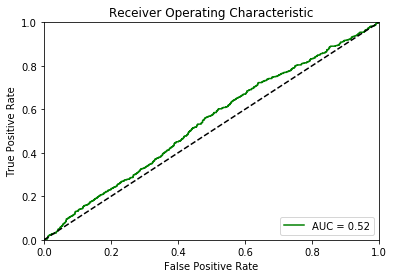

In [75]:
model = SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

### Logistic

[[700 567]
 [254 385]]
              precision    recall  f1-score   support

         0.0       0.73      0.55      0.63      1267
         1.0       0.40      0.60      0.48       639

    accuracy                           0.57      1906
   macro avg       0.57      0.58      0.56      1906
weighted avg       0.62      0.57      0.58      1906

AUC ->  0.5774950501041856


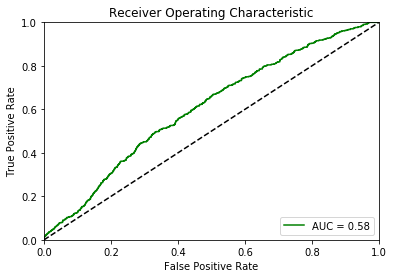

In [256]:
model = LogisticRegression(random_state =10, class_weight='balanced')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

In [257]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [299]:
params = {'C':[1000,500,100,10,0.1,0.01,0.001,0.0001],
          'tol':[1000,500,100,10,1,0.01,0.001,0.0001],
          'max_iter':[100,300,500,1000],
          'solver': ['newton-cg', 'liblinear', 'sag', 'saga', 'lbfgs'],
          'penalty': ['l1','l2','elasticnet']}
          

RandomCV = RandomizedSearchCV(estimator = LogisticRegression(class_weight='balanced', random_state =10),
                              cv =5,
                              n_iter =10,
                              verbose =2,
                              param_distributions =params,
                              random_state =12,
                              scoring ='f1')

RandomCV.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] tol=10, solver=saga, penalty=l2, max_iter=1000, C=10 ............
[CV]  tol=10, solver=saga, penalty=l2, max_iter=1000, C=10, total=   0.0s
[CV] tol=10, solver=saga, penalty=l2, max_iter=1000, C=10 ............
[CV]  tol=10, solver=saga, penalty=l2, max_iter=1000, C=10, total=   0.0s
[CV] tol=10, solver=saga, penalty=l2, max_iter=1000, C=10 ............
[CV]  tol=10, solver=saga, penalty=l2, max_iter=1000, C=10, total=   0.0s
[CV] tol=10, solver=saga, penalty=l2, max_iter=1000, C=10 ............
[CV]  tol=10, solver=saga, penalty=l2, max_iter=1000, C=10, total=   0.0s
[CV] tol=10, solver=saga, penalty=l2, max_iter=1000, C=10 ............
[CV]  tol=10, solver=saga, penalty=l2, max_iter=1000, C=10, total=   0.0s
[CV] tol=10, solver=liblinear, penalty=l1, max_iter=500, C=10 ........
[CV]  tol=10, solver=liblinear, penalty=l1, max_iter=500, C=10, total=   0.0s
[CV] tol=10, solver=liblinear, penalty=l1, max_iter=500, C=10 ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Anirban\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
C:\Users\Anirban\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\Anirban\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100, total=   0.1s
[CV] tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100 
[CV]  tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100, total=   0.0s
[CV] tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100 
[CV]  tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100, total=   0.0s
[CV] tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100 
[CV]  tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100, total=   0.0s
[CV] tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100 
[CV]  tol=0.001, solver=liblinear, penalty=elasticnet, max_iter=1000, C=100, total=   0.0s
[CV] tol=0.01, solver=newton-cg, penalty=elasticnet, max_iter=1000, C=0.001 
[CV]  tol=0.01, solver=newton-cg, penalty=elasticnet, max_iter=1000, C=0.001, total=   0.0s
[CV] tol=0.01, solver=newton-cg, penalty=elasticnet, max_iter=1000, C=0.

C:\Users\Anirban\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=10,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1000, 500, 100, 10, 0.1, 0.01,
                                              0.001, 0.0001],
                                        'max_iter': [100, 300, 500, 1000],
                                        'penalty': ['l1', 'l2',

In [300]:
RandomCV.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='saga', tol=10, verbose=0,
                   warm_start=False)

[[689 578]
 [269 370]]
              precision    recall  f1-score   support

         0.0       0.72      0.54      0.62      1267
         1.0       0.39      0.58      0.47       639

    accuracy                           0.56      1906
   macro avg       0.55      0.56      0.54      1906
weighted avg       0.61      0.56      0.57      1906

AUC ->  0.5614169979978088


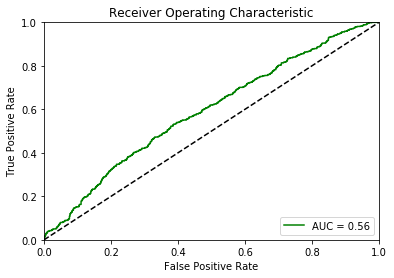

In [298]:
model = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='saga', tol=10, verbose=0,
                   warm_start=False)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

### SGD

[[645 622]
 [239 400]]
              precision    recall  f1-score   support

         0.0       0.73      0.51      0.60      1267
         1.0       0.39      0.63      0.48       639

    accuracy                           0.55      1906
   macro avg       0.56      0.57      0.54      1906
weighted avg       0.62      0.55      0.56      1906

AUC ->  0.5675273247835695


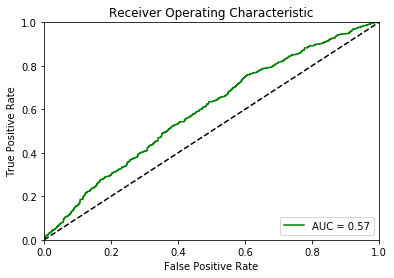

In [301]:
model = SGDClassifier(class_weight= 'balanced', random_state=10)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

In [302]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': 'balanced',
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [307]:
params = {'alpha':[1000,100,10,0.1,0.01,0.001,0.0001],
          'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
          'penalty': ['l1','l2','elasticnet']}
          

RandomCV = RandomizedSearchCV(estimator = SGDClassifier(class_weight='balanced', random_state =10, shuffle= True),
                              cv =5,
                              n_iter =10,
                              verbose =2,
                              param_distributions =params,
                              random_state =12,
                              scoring ='balanced_accuracy')

RandomCV.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l2, loss=modified_huber, alpha=1000 .....................
[CV] ...... penalty=l2, loss=modified_huber, alpha=1000, total=   0.0s
[CV] penalty=l2, loss=modified_huber, alpha=1000 .....................
[CV] ...... penalty=l2, loss=modified_huber, alpha=1000, total=   0.0s
[CV] penalty=l2, loss=modified_huber, alpha=1000 .....................
[CV] ...... penalty=l2, loss=modified_huber, alpha=1000, total=   0.0s
[CV] penalty=l2, loss=modified_huber, alpha=1000 .....................
[CV] ...... penalty=l2, loss=modified_huber, alpha=1000, total=   0.0s
[CV] penalty=l2, loss=modified_huber, alpha=1000 .....................
[CV] ...... penalty=l2, loss=modified_huber, alpha=1000, total=   0.0s
[CV] penalty=l1, loss=modified_huber, alpha=10 .......................
[CV] ........ penalty=l1, loss=modified_huber, alpha=10, total=   0.0s
[CV] penalty=l1, loss=modified_huber, alpha=10 .......................
[CV] ........ pe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] penalty=l1, loss=modified_huber, alpha=10 .......................
[CV] ........ penalty=l1, loss=modified_huber, alpha=10, total=   0.1s
[CV] penalty=l2, loss=hinge, alpha=0.1 ...............................
[CV] ................ penalty=l2, loss=hinge, alpha=0.1, total=   0.0s
[CV] penalty=l2, loss=hinge, alpha=0.1 ...............................
[CV] ................ penalty=l2, loss=hinge, alpha=0.1, total=   0.0s
[CV] penalty=l2, loss=hinge, alpha=0.1 ...............................
[CV] ................ penalty=l2, loss=hinge, alpha=0.1, total=   0.0s
[CV] penalty=l2, loss=hinge, alpha=0.1 ...............................
[CV] ................ penalty=l2, loss=hinge, alpha=0.1, total=   0.0s
[CV] penalty=l2, loss=hinge, alpha=0.1 ...............................
[CV] ................ penalty=l2, loss=hinge, alpha=0.1, total=   0.0s
[CV] penalty=elasticnet, loss=hinge, alpha=100 .......................
[CV] ........ penalty=elasticnet, loss=hinge, alpha=100, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight='balanced',
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=10, shuffle=True,
                                           tol=0.001, validation_fra...
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'al

In [308]:
RandomCV.best_estimator_

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=10, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

[[809 458]
 [315 324]]
              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68      1267
         1.0       0.41      0.51      0.46       639

    accuracy                           0.59      1906
   macro avg       0.57      0.57      0.57      1906
weighted avg       0.62      0.59      0.60      1906

AUC ->  0.5727792167368854


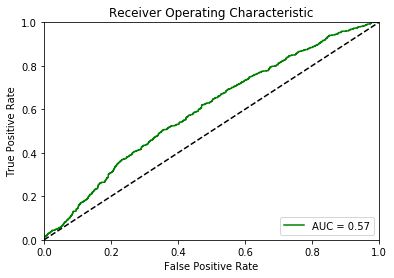

In [309]:
model = SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=10, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print("AUC -> ",roc_auc_score(ytest,ypred))
plot_roc(model,xtest,ytest,'g')

<b> So from above models we can say Logistic Regression is giving us the best ROC score of 58%. hence finalizing our model:

In [77]:
LRmodel = LogisticRegression(C=1.0,
                       class_weight='balanced',
                       dual=False,
                       fit_intercept=True,
                       intercept_scaling=1,
                       l1_ratio=None,
                       max_iter=100,
                       multi_class='auto',
                       n_jobs=None,
                       penalty='l2',
                       random_state=10,
                       solver='lbfgs',
                       tol=0.0001,
                       verbose=0,
                       warm_start=False)
LRmodel.fit(xtrain,ytrain)
Y = LRmodel.predict(scaled_test)

In [78]:
data = pd.DataFrame(columns = ['ID','Business_Sourced'])
data['Business_Sourced'] = Y
data['ID'] = ID
data.to_csv("output.csv", index = False, header=True)